# Final Project Part 4: Modeling Performance


In [14]:
##import the needed Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import matplotlib.pyplot as plt # Matlab-style plott
import seaborn as sns
color = sns.color_palette(sns.hls_palette(8, l=.3, s=.8))
from sklearn import feature_selection, linear_model, metrics#scikit-learn- Regression
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn import linear_model, metrics
from sklearn import feature_selection
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('cleandata.csv')
df.head()

,Unnamed: 0,order_id,reordered,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,0,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
2,2,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
3,3,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8
4,4,1,1,0,0,0,0,0,1,1,...,0,1,0,112108,train,4,4,10,9.0,8


In [3]:
del df['Unnamed: 0']
del df['reordered']
df.head()

,order_id,department_babies,department_bakery,department_beverages,department_breakfast,department_bulk,department_canned goods,department_dairy eggs,department_deli,department_dry goods pasta,...,department_pets,department_produce,department_snacks,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,basket_count
0,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
1,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
2,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
3,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8
4,1,0,0,0,0,0,1,1,0,0,...,0,1,0,112108,train,4,4,10,9.0,8


In [4]:
len(df)

33819106

In [5]:
#splitting up the orders by Set
z=int(len(df)*0.8)
df_prior = df[0:500000]
df_train = df[500000:1000000]




In [6]:
#Edit Data to create first regression & See correlations based on departments

columns_to_keep = ['basket_count', 'department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']
data = df_prior[columns_to_keep]


In [7]:
X_train = data.loc[:,['department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']]
y_train = data["basket_count"]

alphas = np.logspace(-10, 10, 21)
gs = GridSearchCV(
    cv=10,
    estimator = linear_model.Ridge(),
    param_grid={'alpha': alphas, 'fit_intercept': [True, False], },
    scoring='mean_squared_error')

gs.fit(X_train, y_train)

/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


GridSearchCV(cv=10, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-10,   1.00000e-09,   1.00000e-08,   1.00000e-07,
         1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03,   1.00000e+04,   1.00000e+05,
         1.00000e+06,   1.00000e+07,   1.00000e+08,   1.00000e+09,
         1.00000e+10]), 'fit_intercept': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [17]:
gs.best_estimator_

Ridge(alpha=100.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [18]:
-gs.best_score_

35.840503476209619

In [20]:
gs.grid_scores_

/Users/alastra/anaconda/lib/python2.7/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -35.84089, std: 2.52272, params: {'alpha': 1e-10, 'fit_intercept': True},
 mean: -36.52329, std: 2.62866, params: {'alpha': 1e-10, 'fit_intercept': False},
 mean: -35.84089, std: 2.52272, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': True},
 mean: -36.52329, std: 2.62866, params: {'alpha': 1.0000000000000001e-09, 'fit_intercept': False},
 mean: -35.84089, std: 2.52272, params: {'alpha': 1e-08, 'fit_intercept': True},
 mean: -36.52329, std: 2.62866, params: {'alpha': 1e-08, 'fit_intercept': False},
 mean: -35.84089, std: 2.52272, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': True},
 mean: -36.52329, std: 2.62866, params: {'alpha': 9.9999999999999995e-08, 'fit_intercept': False},
 mean: -35.84089, std: 2.52272, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': True},
 mean: -36.52329, std: 2.62866, params: {'alpha': 9.9999999999999995e-07, 'fit_intercept': False},
 mean: -35.84089, std: 2.52272, params: {'alpha': 1.0000000000000001e-05, 'fit_inte

In [9]:
X_test = df_train.loc[:,['department_snacks', 'department_produce', 'department_pets','department_personal care', 'department_pantry', 'department_other', 'department_missing', 'department_meat seafood', 'department_international', 'department_household', 'department_frozen', 'department_dry goods pasta', 'department_deli', 'department_dairy eggs', 'department_canned goods', 'department_bulk', 'department_breakfast', 'department_beverages', 'department_bakery', 'department_babies']]
y_test = df_train["basket_count"]

In [21]:
predictions = gs.best_estimator_.predict(X_test)

In [22]:
print predictions

[ 18.59149641  18.59149641  18.59149641 ...,  18.00312647  18.00312647
  18.00312647]


In [23]:
mean_squared_error(y_test, predictions1)

39.800885883718564

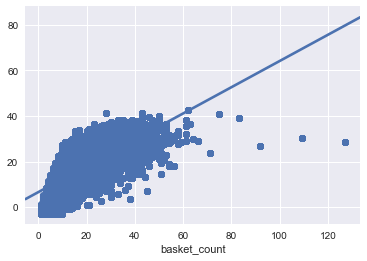

In [27]:
sns.regplot(y_test, predictions)

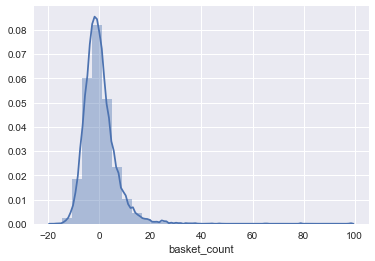

In [28]:
sns.distplot(y_test-predictions, bins=30)

In [35]:
features = X_train.columns
feature_coef = gs.best_estimator_.coef_
features_df = pd.DataFrame({'Features': features, 'Importance': feature_coef})
features_df.sort_values('Importance', inplace=True, ascending=False)

features_df

,Features,Importance
6,department_missing,4.145426
1,department_produce,3.985178
5,department_other,3.966138
19,department_babies,3.756740
13,department_dairy eggs,3.350113
0,department_snacks,3.178121
15,department_bulk,3.052499
12,department_deli,3.042409
14,department_canned goods,3.011607
4,department_pantry,2.892114
